# This notebook aims to simulate PCR test to detect SNPs.
by: Luis Aguilera. Nov 18, 2015.
____

In [ ]:
# Install the PyPCRtool package
!pip install PyPCRtool
!pip install biopython

In [5]:
# Load libraries 
from pathlib import Path
from pypcrtool.pcr import InSilicoPCR
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Bio.Seq import Seq

In [ ]:
# Test example for proof of concept
fasta_path = Path("test_sequence.fasta")
fasta_path.write_text(
    ">sequence\n"
    "ATGCGTACGTTAGCTAGCTAGGCAATGATCTTAGTAGCATCCTAATAACTTATTAGCTAGCGTACGATCGTACGTTAGCTAGCTAGCGTACGATCG\n"
)


CGATCGTACGCTAGCT


In [ ]:
forward_primer = "ATGCGTACGTTAGC"  
sequence = Seq("AGCTAGCGTACGATCG")
reverse_primer = sequence.reverse_complement()
print(reverse_primer)

In [9]:
pcr_tube = InSilicoPCR(
    forward_primer=forward_primer,
    reverse_primer=reverse_primer,
    sequence_file=str(fasta_path),
)

pcr_products = pcr_tube.perform_pcr()

In [10]:
pcr_tube.print_products(pcr_products)

>product_1 size=70bp start=0 end=70
ATGCGTACGTTAGCTAGCTAGGCAATGATCTTAGTAGCATCCTAATAACTTATTAGCTAGCGTACGATCG
>product_2 size=96bp start=0 end=96
ATGCGTACGTTAGCTAGCTAGGCAATGATCTTAGTAGCATCCTAATAACTTATTAGCTAGCGTACGATCGTACGTTAGCTAGCTAGCGTACGATCG

Total PCR products: 2


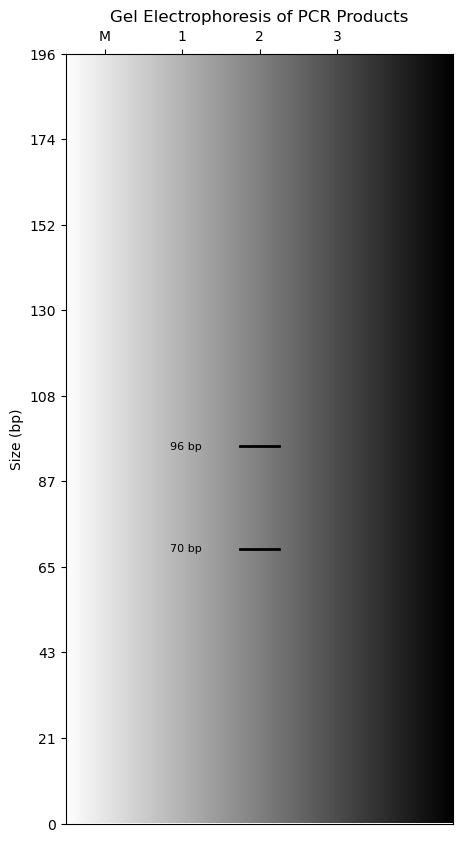

In [12]:
pcr_tube.visualize_gel(pcr_products,)